In [37]:
from pandas import Series, DataFrame
import pandas as pd
import re
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [38]:
#import dataset

df = pd.read_csv('Teams.csv')

In [39]:
#view column values

df.columns.values

array(['year', 'league', 'team', 'franchise', 'division', 'rank', 'games',
       'home games', 'wins', 'losses', 'division winner',
       'wild card winner', 'league winner', 'world series winner', 'runs',
       'at bat', 'hits', 'doubles', 'triples', 'homeruns', 'walks',
       'strike outs', 'stolen bases', 'caught stealing', 'batters hit',
       'sacrifice flies', 'opponent runs scored', 'earned runs allowed',
       'earned runs average', 'complete games', 'shutouts', 'saves',
       'outs pitched', 'hits allowed', 'homeruns allowed', 'walks allowed',
       'strikeouts by pitchers', 'errors', 'double plays',
       'fielding pertcentage', 'team name', 'park', 'attendance', 'BPF',
       'PPF', 'teamIDBR', 'teamIDlahman45', 'teamIDretro'], dtype=object)

In [50]:
#get rid of years w/o world series

df_year_mask = df['year'] >= 1905
df = df[df_year_mask]

df_year_mask = df['year'] != 1994
df = df[df_year_mask]

In [48]:
#normalize the dataset

df_normalized = df[['year', 'league', 'team', 'rank', 'games', 'home games', 'wins', 'losses', 'division winner',
       'wild card winner', 'league winner', 'world series winner', 'runs',
       'at bat', 'hits', 'doubles', 'triples', 'homeruns', 'walks',
       'strike outs', 'stolen bases', 'caught stealing', 'batters hit',
       'sacrifice flies', 'opponent runs scored', 'earned runs allowed',
       'earned runs average', 'complete games', 'shutouts', 'saves',
       'outs pitched', 'hits allowed', 'homeruns allowed', 'walks allowed',
       'strikeouts by pitchers', 'errors', 'double plays',
       'fielding pertcentage', 'team name']].copy()

df_normalized['wins'] = df_normalized['wins']/df_normalized['games']
df_normalized['losses'] = df_normalized['wins']/df_normalized['games']
df_normalized['runs'] = df_normalized['runs']/df_normalized['games']
df_normalized['at bat'] = df_normalized['at bat']/df_normalized['games']
df_normalized['hits'] = df_normalized['hits']/df_normalized['games']
df_normalized['doubles'] = df_normalized['doubles']/df_normalized['games']
df_normalized['triples'] = df_normalized['triples']/df_normalized['games']
df_normalized['homeruns'] = df_normalized['homeruns']/df_normalized['games']
df_normalized['walks'] = df_normalized['walks']/df_normalized['games']
df_normalized['strike outs'] = df_normalized['strike outs']/df_normalized['games']
df_normalized['stolen bases'] = df_normalized['stolen bases']/df_normalized['games']
df_normalized['caught stealing'] = df_normalized['caught stealing']/df_normalized['games']
df_normalized['batters hit'] = df_normalized['batters hit']/df_normalized['games']
df_normalized['sacrifice flies'] = df_normalized['sacrifice flies']/df_normalized['games']
df_normalized['opponent runs scored'] = df_normalized['opponent runs scored']/df_normalized['games']
df_normalized['earned runs allowed'] = df_normalized['earned runs allowed']/df_normalized['games']
df_normalized['complete games'] = df_normalized['complete games']/df_normalized['games']
df_normalized['shutouts'] = df_normalized['shutouts']/df_normalized['games']
df_normalized['saves'] = df_normalized['saves']/df_normalized['games']
df_normalized['outs pitched'] = df_normalized['outs pitched']/df_normalized['games']
df_normalized['hits allowed'] = df_normalized['hits allowed']/df_normalized['games']
df_normalized['homeruns allowed'] = df_normalized['homeruns allowed']/df_normalized['games']
df_normalized['walks allowed'] = df_normalized['walks allowed']/df_normalized['games']
df_normalized['strikeouts by pitchers'] = df_normalized['strikeouts by pitchers']/df_normalized['games']
df_normalized['errors'] = df_normalized['errors']/df_normalized['games']
df_normalized['double plays'] = df_normalized['double plays']/df_normalized['games']
df_normalized['fielding pertcentage'] = df_normalized['fielding pertcentage']/df_normalized['games']

df_normalized[:10]

,year,league,team,rank,games,home games,wins,losses,division winner,wild card winner,...,saves,outs pitched,hits allowed,homeruns allowed,walks allowed,strikeouts by pitchers,errors,double plays,fielding pertcentage,team name
447,1905,AL,BOS,4,153,77.0,0.509804,0.003332,NaN,NaN,...,0.006536,26.588235,7.830065,0.215686,1.908497,4.261438,1.895425,0.490196,0.006209,Boston Americans
448,1905,NL,BRO,8,155,77.0,0.309677,0.001998,NaN,NaN,...,0.019355,26.070968,9.135484,0.154839,3.070968,3.587097,2.632258,0.651613,0.006000,Brooklyn Superbas
449,1905,NL,BSN,7,156,76.0,0.326923,0.002096,NaN,NaN,...,0.000000,26.596154,8.910256,0.230769,2.775641,3.416667,1.993590,0.570513,0.006090,Boston Beaneaters
450,1905,AL,CHA,2,158,82.0,0.582278,0.003685,NaN,NaN,...,0.000000,27.094937,7.360759,0.069620,2.082278,3.879747,1.373418,0.405063,0.006076,Chicago White Sox
451,1905,NL,CHN,3,155,81.0,0.593548,0.003829,NaN,NaN,...,0.012903,27.232258,7.322581,0.090323,2.483871,4.045161,1.587097,0.638710,0.006194,Chicago Cubs
452,1905,NL,CIN,5,155,79.0,0.509677,0.003288,NaN,NaN,...,0.012903,26.419355,9.090323,0.141935,2.832258,3.529032,2.000000,0.787097,0.006129,Cincinnati Reds
453,1905,AL,CLE,5,155,77.0,0.490323,0.003163,NaN,NaN,...,0.000000,26.380645,8.070968,0.148387,2.154839,3.580645,1.503226,0.541935,0.006194,Cleveland Naps
454,1905,AL,DET,3,154,76.0,0.512987,0.003331,NaN,NaN,...,0.006494,26.259740,7.961039,0.071429,3.077922,3.753247,1.714286,0.519481,0.006169,Detroit Tigers
455,1905,NL,NY1,1,155,76.0,0.677419,0.004370,NaN,NaN,...,0.096774,26.516129,7.483871,0.161290,2.348387,4.903226,1.632258,0.600000,0.006194,New York Giants
456,1905,AL,NYA,6,152,75.0,0.467105,0.003073,NaN,NaN,...,0.026316,26.703947,8.125000,0.171053,2.605263,4.223684,1.927632,0.578947,0.006250,New York Highlanders


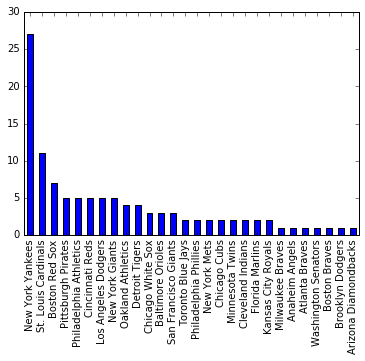

In [53]:
#create a mask on teams that won the world series

df_ws_mask = df_normalized['world series winner'] == 'Y'
df_ws_win = df_normalized[df_ws_mask]
df_ws_win['team name'].value_counts().plot(kind='bar')

In [ ]:
#['year', 'league', 'team', 'franchise', 'division', 'rank', 'games','home games', 'wins', 'losses', 'division winner',
#       'wild card winner', 'league winner', 'world series winner', 'runs','at bat', 'hits', 'doubles', 'triples', 'homeruns', 'walks',
#       'strike outs', 'stolen bases', 'caught stealing', 'batters hit','sacrifice flies', 'opponent runs scored', 'earned runs allowed',
#       'earned runs average', 'complete games', 'shutouts', 'saves','outs pitched', 'hits allowed', 'homeruns allowed', 'walks allowed',
#       'strikeouts by pitchers', 'errors', 'double plays','fielding pertcentage', 'team name', 'park', 'attendance', 'BPF',
#       'PPF', 'teamIDBR', 'teamIDlahman45', 'teamIDretro']

#Rankings for each variable 